In [9]:
from xiaonet import *

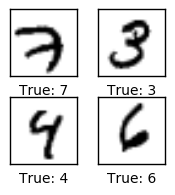

In [12]:
# load the complete MNIST dataset
from xiaoloader import load_mnist
dataset = load_mnist()

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

images = dataset.train.images[0:4]
labels = np.array([label.argmax() for label in dataset.train.labels[0:4]])
plot_images(images, labels) # MNIST are 28 x 28

In [11]:
def train_data():

    start_time = time.time()

    steps = len(train_images) // BATCH_SIZE

    for i in range(400):

        for step in range(steps):

            batch_x, batch_y = next_batch(train_images, train_labels, BATCH_SIZE)

            loss = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

        val_loss, val_acc = eval_data(validation_images, validation_labels)

        if i % 10 == 0:
            msg = "EPOCH {} ... Validation loss = {}, Validation accuracy = {}%"
            print(msg.format(i+1, val_loss, val_acc))

    end_time = time.time()

    time_dif = end_time - start_time

    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [5]:
BATCH_SIZE = 250

EPOCHS = 2

M = 784 # 28 x 28 pixels

P = 10 # number of possible classes

N = 512 # hidden neurons

b1 = 10 # number of possible classes

b2 = 512 # hidden neurons

steps = len(dataset.train.images) // BATCH_SIZE # 220 steps

w1 = np.random.normal(0.0, pow(10, -0.5), (BATCH_SIZE, N, P))

w2 = np.random.normal(0.0, pow(10, -0.5), (BATCH_SIZE, M, N))

b1 = np.random.normal(0.0, pow(10, -0.5), (BATCH_SIZE, 10))

b2 = np.random.normal(0.0, pow(10, -0.5), (BATCH_SIZE, 512))

In [8]:
batch_x, batch_y = dataset.train.next_batch(BATCH_SIZE)

x = Input(w1, b1)

h = Hidden(x, w2, b2)

# r = Relu(h)

# h = Hidden(r, w2, b2)

g = Softmax(h)

distance = CrossEntropy(g) # numpy.mean(CrossEntropy) over BATCH SIZE

for i in range(EPOCHS):
    
    for step in range(steps):

        batch_x, batch_y = dataset.train.next_batch(BATCH_SIZE)
        
        
        train_SGD({x: batch_x}, batch_y, [w1, w2, b1, b2], 10)


(250, 784)


AttributeError: 'Input' object has no attribute 'x'